# Day 1 Laboratory - Familiarise with Jupyter and Pandas

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load dataset and explore it

In general, search on the documentation online
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html?highlight=csv#pandas.read_csv
or type `?<func_name>` for help in here. For example `?pd.read_csv`.

In [2]:
url = 'https://data.london.gov.uk/download/animal-rescue-incidents-attended-by-lfb/01007433-55c2-4b8a-b799-626d9e3bc284/Animal%20Rescue%20incidents%20attended%20by%20LFB%20from%20Jan%202009.csv' 
df = pd.read_csv(url)

In [3]:
df

IncidentNumber       DateTimeOfCall  CalYear  FinYear   TypeOfIncident   
0              139091  2009-01-01 03:01:00     2009  2008/09  Special Service  \
1              275091  2009-01-01 08:51:00     2009  2008/09  Special Service   
2             2075091  2009-01-04 10:07:00     2009  2008/09  Special Service   
3             2872091  2009-01-05 12:27:00     2009  2008/09  Special Service   
4             3553091  2009-01-06 15:23:00     2009  2008/09  Special Service   
...               ...                  ...      ...      ...              ...   
9332  043885-29032023  2023-03-29 20:11:00     2023  2022/23  Special Service   
9333  044188-30032023  2023-03-30 12:55:00     2023  2022/23  Special Service   
9334  044237-30032023  2023-03-30 15:19:00     2023  2022/23  Special Service   
9335  044337-30032023  2023-03-30 18:53:00     2023  2022/23  Special Service   
9336  044540-31032023  2023-03-31 04:33:00     2023  2022/23  Special Service   

      PumpCount  PumpHoursTotal  HourlyNotionalCost(£)   
0           1.0             2.0                    255  \
1           1.0             1.0                    255   
2           1.0             1.0                    255   
3           1.0             1.0                    255   
4           1.0             1.0                    255   
...         ...             ...                    ...   
9332        1.0             1.0                    364   
9333        1.0             1.0                    364   
9334        1.0             1.0                    364   
9335        1.0             1.0                    364   
9336        1.0             1.0                    364   

      IncidentNotionalCost(£)   
0                       510.0  \
1                       255.0   
2                       255.0   
3                       255.0   
4                       255.0   
...                       ...   
9332                    364.0   
9333                    364.0   
9334                    364.0   
9335                    364.0   
9336                    364.0   

                                       FinalDescription  ...          UPRN   
0                                              Redacted  ...           NaN  \
1                                              Redacted  ...           NaN   
2                                              Redacted  ...           NaN   
3                                              Redacted  ...  1.000215e+11   
4                                              Redacted  ...           NaN   
...                                                 ...  ...           ...   
9332                             KITTEN INJURED IN TREE  ...  1.002377e+10   
9333                      SMALL ANIMAL STUCK IN CHIMNEY  ...           NaN   
9334  BIRD TRAPPED IN NETTING ON THE SIDE OF THE BRI...  ...  1.000111e+10   
9335               INJURED KITTEN  LOCKED IN GATED AREA  ...           NaN   
9336                                           Redacted  ...           NaN   

              Street        USRN PostcodeDistrict Easting_m Northing_m   
0     Waddington Way  20500146.0             SE19       NaN        NaN  \
1      Grasmere Road         NaN             SE25  534785.0   167546.0   
2          Mill Lane         NaN              SM5  528041.0   164923.0   
3          Park Lane  21401484.0              UB9  504689.0   190685.0   
4       Swindon Lane  21300122.0              RM3       NaN        NaN   
...              ...         ...              ...       ...        ...   
9332   VICARAGE LANE  22302502.0              IG1  544929.0   187209.0   
9333     DEVONS ROAD  22700408.0               E3       NaN        NaN   
9334    GREET STREET  21900640.0              SE1  531413.0   180091.0   
9335   WIGHTMAN ROAD  21106644.0               N4       NaN        NaN   
9336      GLOBE ROAD  22700551.0               E2       NaN        NaN   

     Easting_rounded Northing_rounded   Latitude Longitude  
0             532350           170050        NaN     

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9337 entries, 0 to 9336
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IncidentNumber              9337 non-null   object 
 1   DateTimeOfCall              9337 non-null   object 
 2   CalYear                     9337 non-null   int64  
 3   FinYear                     9337 non-null   object 
 4   TypeOfIncident              9337 non-null   object 
 5   PumpCount                   9273 non-null   float64
 6   PumpHoursTotal              9272 non-null   float64
 7   HourlyNotionalCost(£)       9337 non-null   int64  
 8   IncidentNotionalCost(£)     9272 non-null   float64
 9   FinalDescription            9332 non-null   object 
 10  AnimalGroupParent           9337 non-null   object 
 11  OriginofCall                9337 non-null   object 
 12  PropertyType                9337 non-null   object 
 13  PropertyCategory            9337 

## Data preparation

### Null values management

In [5]:
df.isna().sum()

IncidentNumber                   0
DateTimeOfCall                   0
CalYear                          0
FinYear                          0
TypeOfIncident                   0
PumpCount                       64
PumpHoursTotal                  65
HourlyNotionalCost(£)            0
IncidentNotionalCost(£)         65
FinalDescription                 5
AnimalGroupParent                0
OriginofCall                     0
PropertyType                     0
PropertyCategory                 0
SpecialServiceTypeCategory       0
SpecialServiceType               0
WardCode                        10
Ward                            10
BoroughCode                     12
Borough                         12
StnGroundName                    0
UPRN                          5896
Street                           0
USRN                          1156
PostcodeDistrict                 0
Easting_m                     4877
Northing_m                    4877
Easting_rounded                  0
Northing_rounded    

In [6]:
df[(df.PumpCount.isna()) & (df.PumpHoursTotal.isna())]

IncidentNumber       DateTimeOfCall  CalYear  FinYear   TypeOfIncident   
314         119148091  2009-07-05 09:25:00     2009  2009/10  Special Service  \
355         132513091  2009-07-25 11:17:00     2009  2009/10  Special Service   
523         208663091  2009-11-17 16:16:00     2009  2009/10  Special Service   
1268         43265111  2011-03-26 09:53:00     2011  2010/11  Special Service   
1394         76409111  2011-05-17 22:12:00     2011  2011/12  Special Service   
...               ...                  ...      ...      ...              ...   
8692  108669-17072022  2022-07-17 18:13:00     2022  2022/23  Special Service   
8834  141972-25082022  2022-08-25 10:34:00     2022  2022/23  Special Service   
8882  150994-10092022  2022-09-10 15:20:00     2022  2022/23  Special Service   
8977  169036-13102022  2022-10-13 16:37:00     2022  2022/23  Special Service   
9054  186378-13112022  2022-11-13 00:09:00     2022  2022/23  Special Service   

      PumpCount  PumpHoursTotal  HourlyNotionalCost(£)   
314         NaN             NaN                    260  \
355         NaN             NaN                    260   
523         NaN             NaN                    260   
1268        NaN             NaN                    260   
1394        NaN             NaN                    260   
...         ...             ...                    ...   
8692        NaN             NaN                    364   
8834        NaN             NaN                    364   
8882        NaN             NaN                    364   
8977        NaN             NaN                    364   
9054        NaN             NaN                    364   

      IncidentNotionalCost(£)                          FinalDescription  ...   
314                       NaN            CAT TRAPPED UNDER FLOOR BOARDS  ...  \
355                       NaN       KITTEN TRAPPED IN GUTTERING ON ROOF  ...   
523                       NaN                                  Redacted  ...   
1268                      NaN                  DOG IN DISTRESS IN RIVER  ...   
1394                      NaN  RUNNING CALL TO ANMINAL TRAPPED IN FENCE  ...   
...                       ...                                       ...  ...   
8692                      NaN       CAT STUCK ON LEDGE ABOVE FRONT DOOR  ...   
8834                      NaN                                  Redacted  ...   
8882                      NaN                                  Redacted  ...   
8977                      NaN           DOG WITH HEAD STUCK IN RAILINGS  ...   
9054                      NaN       KITTEN STUCK UNDERNEATH FLOORBOARDS  ...   

              UPRN             Street        USRN PostcodeDistrict Easting_m   
314            NaN        Regina Road  20501335.0             SE25       NaN  \
355            NaN      Sandrock Road  22000900.0             SE13       NaN   
523            NaN     Freezeland Way         NaN             UB10  507714.0   
1268           NaN  Albert Embankment         NaN              SE1  530485.0   
1394  1.000234e+11         Faggs Road  21500428.0             TW14  510292.0   
...            ...                ...         ...              ...       ...   
8692           NaN       RUTLAND PARK  20201940.0              NW2       NaN   
8834           NaN   BRONDESBURY ROAD  20202084.0              NW6       NaN   
8882  1.000044e+10   THE QUEEN'S WALK  21902356.0              SE1  530509.0   
8977  1.003356e+10    KENSINGTON ROAD   8400487.0               W8  526149.0   
9054           NaN  JOHN HARRISON WAY  20801698.0             SE10       NaN   

     Northing_m Easting_rounded Northing_rounded   Latitude Longitude  
314         NaN          534250           168650        NaN       NaN  
355         NaN          537450           176050        NaN       NaN  
523    184730.0          507750           184750  51.551189 -0.447845  
1268   179007.0          530450           179050  51.494957 -0.121712  
1394   174713.0          510250           174750  51.46

In [7]:
df[df['IncidentNotionalCost(£)'] == df['HourlyNotionalCost(£)'] * df.PumpHoursTotal]

IncidentNumber       DateTimeOfCall  CalYear  FinYear   TypeOfIncident   
0              139091  2009-01-01 03:01:00     2009  2008/09  Special Service  \
1              275091  2009-01-01 08:51:00     2009  2008/09  Special Service   
2             2075091  2009-01-04 10:07:00     2009  2008/09  Special Service   
3             2872091  2009-01-05 12:27:00     2009  2008/09  Special Service   
4             3553091  2009-01-06 15:23:00     2009  2008/09  Special Service   
...               ...                  ...      ...      ...              ...   
9332  043885-29032023  2023-03-29 20:11:00     2023  2022/23  Special Service   
9333  044188-30032023  2023-03-30 12:55:00     2023  2022/23  Special Service   
9334  044237-30032023  2023-03-30 15:19:00     2023  2022/23  Special Service   
9335  044337-30032023  2023-03-30 18:53:00     2023  2022/23  Special Service   
9336  044540-31032023  2023-03-31 04:33:00     2023  2022/23  Special Service   

      PumpCount  PumpHoursTotal  HourlyNotionalCost(£)   
0           1.0             2.0                    255  \
1           1.0             1.0                    255   
2           1.0             1.0                    255   
3           1.0             1.0                    255   
4           1.0             1.0                    255   
...         ...             ...                    ...   
9332        1.0             1.0                    364   
9333        1.0             1.0                    364   
9334        1.0             1.0                    364   
9335        1.0             1.0                    364   
9336        1.0             1.0                    364   

      IncidentNotionalCost(£)   
0                       510.0  \
1                       255.0   
2                       255.0   
3                       255.0   
4                       255.0   
...                       ...   
9332                    364.0   
9333                    364.0   
9334                    364.0   
9335                    364.0   
9336                    364.0   

                                       FinalDescription  ...          UPRN   
0                                              Redacted  ...           NaN  \
1                                              Redacted  ...           NaN   
2                                              Redacted  ...           NaN   
3                                              Redacted  ...  1.000215e+11   
4                                              Redacted  ...           NaN   
...                                                 ...  ...           ...   
9332                             KITTEN INJURED IN TREE  ...  1.002377e+10   
9333                      SMALL ANIMAL STUCK IN CHIMNEY  ...           NaN   
9334  BIRD TRAPPED IN NETTING ON THE SIDE OF THE BRI...  ...  1.000111e+10   
9335               INJURED KITTEN  LOCKED IN GATED AREA  ...           NaN   
9336                                           Redacted  ...           NaN   

              Street        USRN PostcodeDistrict Easting_m Northing_m   
0     Waddington Way  20500146.0             SE19       NaN        NaN  \
1      Grasmere Road         NaN             SE25  534785.0   167546.0   
2          Mill Lane         NaN              SM5  528041.0   164923.0   
3          Park Lane  21401484.0              UB9  504689.0   190685.0   
4       Swindon Lane  21300122.0              RM3       NaN        NaN   
...              ...         ...              ...       ...        ...   
9332   VICARAGE LANE  22302502.0              IG1  544929.0   187209.0   
9333     DEVONS ROAD  22700408.0               E3       NaN        NaN   
9334    GREET STREET  21900640.0              SE1  531413.0   180091.0   
9335   WIGHTMAN ROAD  21106644.0               N4       NaN        NaN   
9336      GLOBE ROAD  22700551.0               E2       NaN        NaN   

     Easting_rounded Northing_rounded   Latitude Longitude  
0             532350           170050        NaN     

In [8]:
df.dropna(subset=["PumpCount", "PumpHoursTotal"])

IncidentNumber       DateTimeOfCall  CalYear  FinYear   TypeOfIncident   
0              139091  2009-01-01 03:01:00     2009  2008/09  Special Service  \
1              275091  2009-01-01 08:51:00     2009  2008/09  Special Service   
2             2075091  2009-01-04 10:07:00     2009  2008/09  Special Service   
3             2872091  2009-01-05 12:27:00     2009  2008/09  Special Service   
4             3553091  2009-01-06 15:23:00     2009  2008/09  Special Service   
...               ...                  ...      ...      ...              ...   
9332  043885-29032023  2023-03-29 20:11:00     2023  2022/23  Special Service   
9333  044188-30032023  2023-03-30 12:55:00     2023  2022/23  Special Service   
9334  044237-30032023  2023-03-30 15:19:00     2023  2022/23  Special Service   
9335  044337-30032023  2023-03-30 18:53:00     2023  2022/23  Special Service   
9336  044540-31032023  2023-03-31 04:33:00     2023  2022/23  Special Service   

      PumpCount  PumpHoursTotal  HourlyNotionalCost(£)   
0           1.0             2.0                    255  \
1           1.0             1.0                    255   
2           1.0             1.0                    255   
3           1.0             1.0                    255   
4           1.0             1.0                    255   
...         ...             ...                    ...   
9332        1.0             1.0                    364   
9333        1.0             1.0                    364   
9334        1.0             1.0                    364   
9335        1.0             1.0                    364   
9336        1.0             1.0                    364   

      IncidentNotionalCost(£)   
0                       510.0  \
1                       255.0   
2                       255.0   
3                       255.0   
4                       255.0   
...                       ...   
9332                    364.0   
9333                    364.0   
9334                    364.0   
9335                    364.0   
9336                    364.0   

                                       FinalDescription  ...          UPRN   
0                                              Redacted  ...           NaN  \
1                                              Redacted  ...           NaN   
2                                              Redacted  ...           NaN   
3                                              Redacted  ...  1.000215e+11   
4                                              Redacted  ...           NaN   
...                                                 ...  ...           ...   
9332                             KITTEN INJURED IN TREE  ...  1.002377e+10   
9333                      SMALL ANIMAL STUCK IN CHIMNEY  ...           NaN   
9334  BIRD TRAPPED IN NETTING ON THE SIDE OF THE BRI...  ...  1.000111e+10   
9335               INJURED KITTEN  LOCKED IN GATED AREA  ...           NaN   
9336                                           Redacted  ...           NaN   

              Street        USRN PostcodeDistrict Easting_m Northing_m   
0     Waddington Way  20500146.0             SE19       NaN        NaN  \
1      Grasmere Road         NaN             SE25  534785.0   167546.0   
2          Mill Lane         NaN              SM5  528041.0   164923.0   
3          Park Lane  21401484.0              UB9  504689.0   190685.0   
4       Swindon Lane  21300122.0              RM3       NaN        NaN   
...              ...         ...              ...       ...        ...   
9332   VICARAGE LANE  22302502.0              IG1  544929.0   187209.0   
9333     DEVONS ROAD  22700408.0               E3       NaN        NaN   
9334    GREET STREET  21900640.0              SE1  531413.0   180091.0   
9335   WIGHTMAN ROAD  21106644.0               N4       NaN        NaN   
9336      GLOBE ROAD  22700551.0               E2       NaN        NaN   

     Easting_rounded Northing_rounded   Latitude Longitude  
0             532350           170050        NaN     

[]

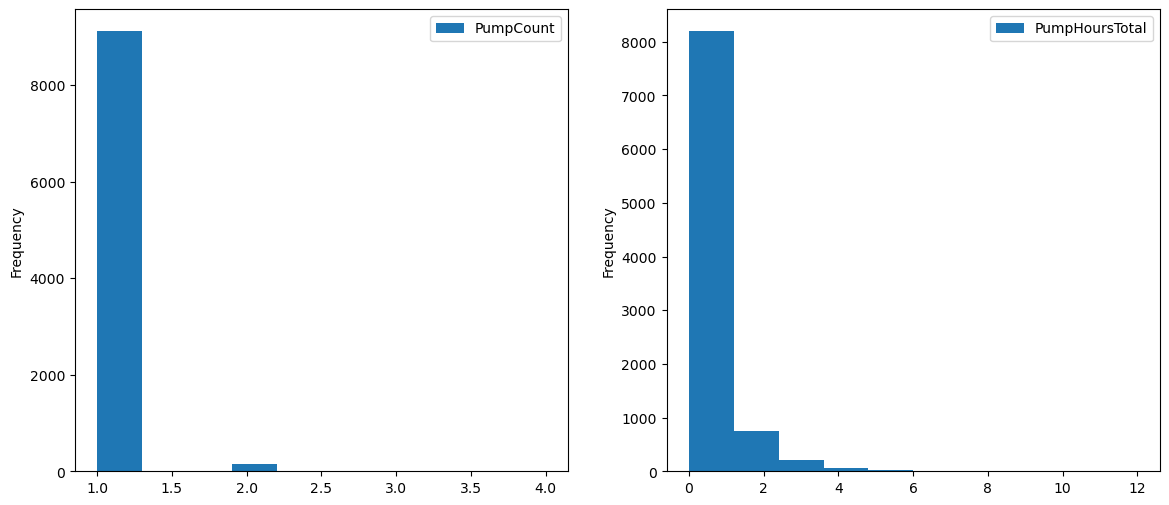

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
df.plot.hist(y="PumpCount", ax=axs[0])
df.plot.hist(y="PumpHoursTotal", ax=axs[1])
plt.plot()

In [10]:
df.fillna({"PumpCount": 1, "PumpHoursTotal": 1}, inplace=True)

In [11]:
df['IncidentNotionalCost(£)'] = df['HourlyNotionalCost(£)'] * df.PumpHoursTotal

In [12]:
df.isna().sum()

IncidentNumber                   0
DateTimeOfCall                   0
CalYear                          0
FinYear                          0
TypeOfIncident                   0
PumpCount                        0
PumpHoursTotal                   0
HourlyNotionalCost(£)            0
IncidentNotionalCost(£)          0
FinalDescription                 5
AnimalGroupParent                0
OriginofCall                     0
PropertyType                     0
PropertyCategory                 0
SpecialServiceTypeCategory       0
SpecialServiceType               0
WardCode                        10
Ward                            10
BoroughCode                     12
Borough                         12
StnGroundName                    0
UPRN                          5896
Street                           0
USRN                          1156
PostcodeDistrict                 0
Easting_m                     4877
Northing_m                    4877
Easting_rounded                  0
Northing_rounded    

### Reduction and optimisation

In [13]:
df.nunique().sort_values()

TypeOfIncident                   1
SpecialServiceTypeCategory       4
PumpCount                        4
PropertyCategory                 7
OriginofCall                     8
PumpHoursTotal                  12
HourlyNotionalCost(£)           12
CalYear                         15
FinYear                         15
SpecialServiceType              24
AnimalGroupParent               28
BoroughCode                     37
Borough                         70
IncidentNotionalCost(£)         78
StnGroundName                  108
PropertyType                   185
PostcodeDistrict               276
Northing_rounded               425
Easting_rounded                530
WardCode                       758
Ward                          1197
UPRN                          3293
Northing_m                    4046
Easting_m                     4110
Longitude                     4391
Latitude                      4391
FinalDescription              5662
USRN                          6246
Street              

In [14]:
df.TypeOfIncident.unique()

array(['Special Service'], dtype=object)

In [15]:
df.drop(columns=['TypeOfIncident'], inplace=True)

In [16]:
df["AnimalGroupParent"].unique()

array(['Dog', 'Fox', 'Horse', 'Rabbit',
       'Unknown - Heavy Livestock Animal', 'Squirrel', 'Cat', 'Bird',
       'Unknown - Domestic Animal Or Pet', 'Sheep', 'Deer',
       'Unknown - Wild Animal', 'Snake', 'Lizard', 'Hedgehog', 'cat',
       'Hamster', 'Lamb', 'Fish', 'Bull', 'Cow', 'Ferret', 'Budgie',
       'Unknown - Animal rescue from water - Farm animal', 'Pigeon',
       'Goat', 'Tortoise',
       'Unknown - Animal rescue from below ground - Farm animal'],
      dtype=object)

In [17]:
df.loc[df["AnimalGroupParent"] == "cat", "AnimalGroupParent"] = "Cat"

In [ ]:
df.loc[df["AnimalGroupParent"] == "Unknown - Domestic Animal Or Pet", "AnimalGroupParent"] = "Domestic"

### Type conversion

In [18]:
df.DateTimeOfCall

0       2009-01-01 03:01:00
1       2009-01-01 08:51:00
2       2009-01-04 10:07:00
3       2009-01-05 12:27:00
4       2009-01-06 15:23:00
               ...         
9332    2023-03-29 20:11:00
9333    2023-03-30 12:55:00
9334    2023-03-30 15:19:00
9335    2023-03-30 18:53:00
9336    2023-03-31 04:33:00
Name: DateTimeOfCall, Length: 9337, dtype: object

In [19]:
pd.to_datetime(df["DateTimeOfCall"]).head()

0   2009-01-01 03:01:00
1   2009-01-01 08:51:00
2   2009-01-04 10:07:00
3   2009-01-05 12:27:00
4   2009-01-06 15:23:00
Name: DateTimeOfCall, dtype: datetime64[ns]

<Axes: >

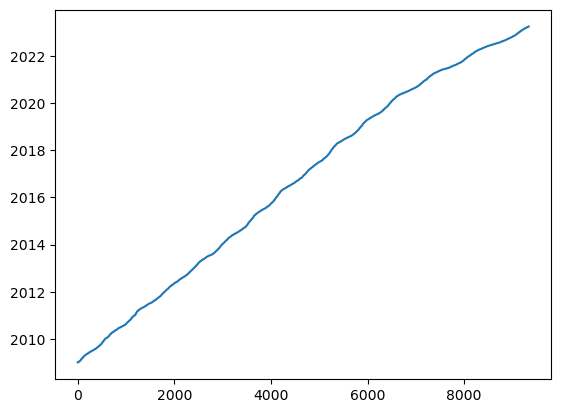

In [20]:
pd.to_datetime(df["DateTimeOfCall"]).plot()

In [21]:
df["DateTimeOfCall"] = pd.to_datetime(df["DateTimeOfCall"])

In [22]:
df.set_index("DateTimeOfCall", inplace=True)

In [23]:
df

IncidentNumber  CalYear  FinYear  PumpCount   
DateTimeOfCall                                                      
2009-01-01 03:01:00           139091     2009  2008/09        1.0  \
2009-01-01 08:51:00           275091     2009  2008/09        1.0   
2009-01-04 10:07:00          2075091     2009  2008/09        1.0   
2009-01-05 12:27:00          2872091     2009  2008/09        1.0   
2009-01-06 15:23:00          3553091     2009  2008/09        1.0   
...                              ...      ...      ...        ...   
2023-03-29 20:11:00  043885-29032023     2023  2022/23        1.0   
2023-03-30 12:55:00  044188-30032023     2023  2022/23        1.0   
2023-03-30 15:19:00  044237-30032023     2023  2022/23        1.0   
2023-03-30 18:53:00  044337-30032023     2023  2022/23        1.0   
2023-03-31 04:33:00  044540-31032023     2023  2022/23        1.0   

                     PumpHoursTotal  HourlyNotionalCost(£)   
DateTimeOfCall                                               
2009-01-01 03:01:00             2.0                    255  \
2009-01-01 08:51:00             1.0                    255   
2009-01-04 10:07:00             1.0                    255   
2009-01-05 12:27:00             1.0                    255   
2009-01-06 15:23:00             1.0                    255   
...                             ...                    ...   
2023-03-29 20:11:00             1.0                    364   
2023-03-30 12:55:00             1.0                    364   
2023-03-30 15:19:00             1.0                    364   
2023-03-30 18:53:00             1.0                    364   
2023-03-31 04:33:00             1.0                    364   

                     IncidentNotionalCost(£)   
DateTimeOfCall                                 
2009-01-01 03:01:00                    510.0  \
2009-01-01 08:51:00                    255.0   
2009-01-04 10:07:00                    255.0   
2009-01-05 12:27:00                    255.0   
2009-01-06 15:23:00                    255.0   
...                                      ...   
2023-03-29 20:11:00                    364.0   
2023-03-30 12:55:00                    364.0   
2023-03-30 15:19:00                    364.0   
2023-03-30 18:53:00                    364.0   
2023-03-31 04:33:00                    364.0   

                                                      FinalDescription   
DateTimeOfCall                                                           
2009-01-01 03:01:00                                           Redacted  \
2009-01-01 08:51:00                                           Redacted   
2009-01-04 10:07:00                                           Redacted   
2009-01-05 12:27:00                                           Redacted   
2009-01-06 15:23:00                                           Redacted   
...                                                                ...   
2023-03-29 20:11:00                             KITTEN INJURED IN TREE   
2023-03-30 12:55:00                      SMALL ANIMAL STUCK IN CHIMNEY   
2023-03-30 15:19:00  BIRD TRAPPED IN NETTING ON THE SIDE OF THE BRI...   
2023-03-30 18:53:00               INJURED KITTEN  LOCKED IN GATED AREA   
2023-03-31 04:33:00                                           Redacted   

                         AnimalGroupParent        OriginofCall  ...   
DateTimeOfCall                                                  ...   
2009-01-01 03:01:00                    Dog  Person (land line)  ...  \
2009-01-01 08:51:00                    Fox  Person (land line)  ...   
2009-01-04 10:07:00                    Dog     Person (mobile)  ...   
2009-01-05 12:27:00                  Horse     Person (mobile)  ...   
2009-01-06 15:23:00                 Rabbit     Person (mobile)  ...   
...                                    ...                 ...  ...   
2023-03-29 20:11:00                    Cat     Person (mobile)  ...   
2023-03-30 12:55:00  Unknown - Wild Animal     Person (mobile)  ...   
2023-03-30 15:19:00

In [24]:
df.loc["2021-01-01":"2021-01-31", "FinalDescription"]

DateTimeOfCall
2021-01-01 12:09:00        KITTEN STUCK UP TREE  AL REQUESTED FROM SCENE
2021-01-01 14:06:00                                             Redacted
2021-01-03 18:40:00                CAT WITH LEG TRAPPED IN BATH PLUGHOLE
2021-01-04 13:39:00                                             Redacted
2021-01-06 10:22:00                                             Redacted
2021-01-06 13:09:00    CAT IN DISTRESS ON ROOF - ADDITIONAL APPLIANCE...
2021-01-06 20:35:00        DOG TRAPPED IN FOX HOLE  - MEET AT CLUB HOUSE
2021-01-07 23:50:00                   KITTEN STUCK BETWEEN WALL AND ROOF
2021-01-09 08:01:00                                  DOG STUCK IN TRENCH
2021-01-10 19:27:00                                             Redacted
2021-01-12 11:39:00                                             Redacted
2021-01-12 22:38:00                                 CAT TRAPPED IN DITCH
2021-01-16 18:05:00                          DOG TRAPPED IN PORTER CABIN
2021-01-17 16:09:00    DOG TRAPPED I

## Visualisation

<Axes: title={'center': 'Monthly Calls'}, xlabel='DateTimeOfCall'>

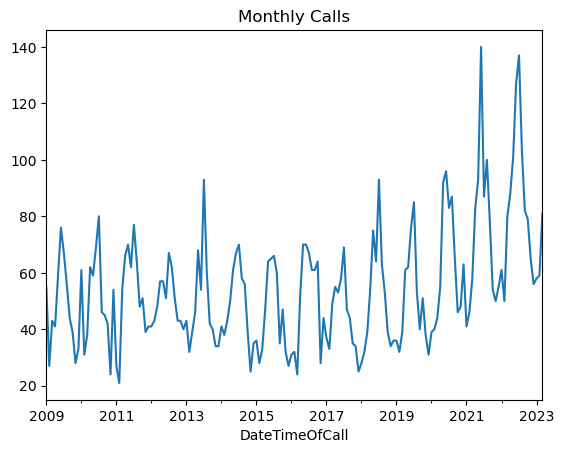

In [25]:
df.resample("M")["IncidentNumber"].count().plot(title="Monthly Calls")

In [43]:
df.resample("M")["IncidentNumber"].count().sort_values(ascending=False).head(20)

DateTimeOfCall
2021-06-30    140
2022-07-31    137
2022-06-30    127
2022-08-31    103
2022-05-31    101
2021-08-31    100
2020-06-30     96
2013-07-31     93
2018-07-31     93
2021-05-31     93
2020-05-31     92
2022-04-30     88
2020-08-31     87
2021-07-31     87
2019-07-31     85
2021-04-30     83
2020-07-31     83
2022-09-30     82
2023-03-31     81
2010-07-31     80
Name: IncidentNumber, dtype: int64

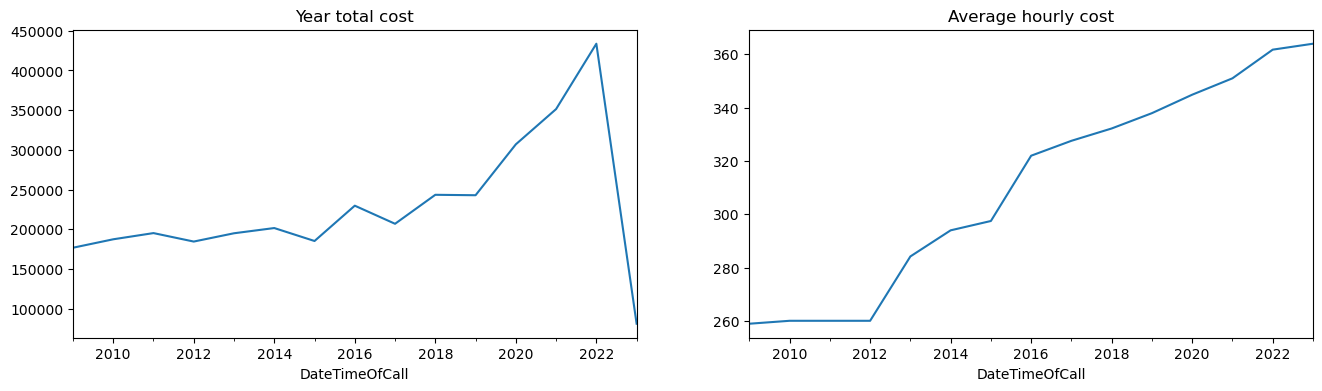

In [27]:
fig, axs = plt.subplots(figsize=(16, 4), ncols=2)
df.resample("Y")["IncidentNotionalCost(£)"].sum().plot(
    title="Year total cost", ax=axs[0]
)
df.resample("Y")["HourlyNotionalCost(£)"].mean().plot(
    title="Average hourly cost", ax=axs[1]
)
# plt.show()

<Axes: ylabel='AnimalGroupParent'>

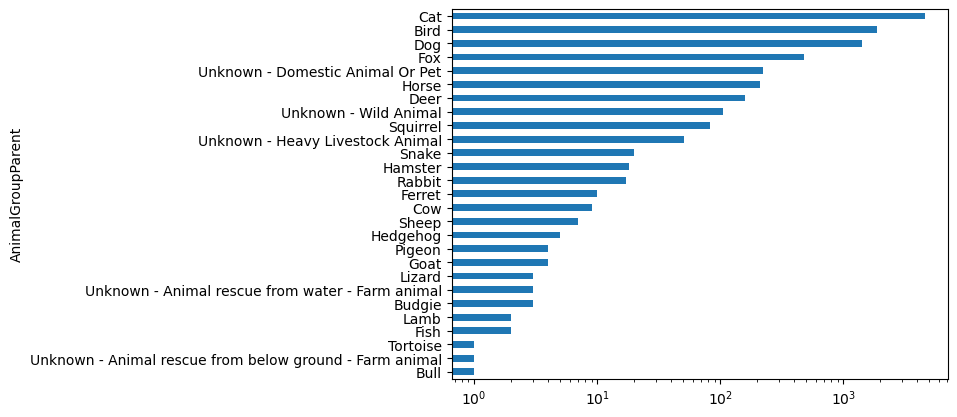

In [28]:
df.groupby("AnimalGroupParent")["IncidentNumber"].count().sort_values().plot.barh(logx=True)

<Axes: xlabel='DateTimeOfCall'>

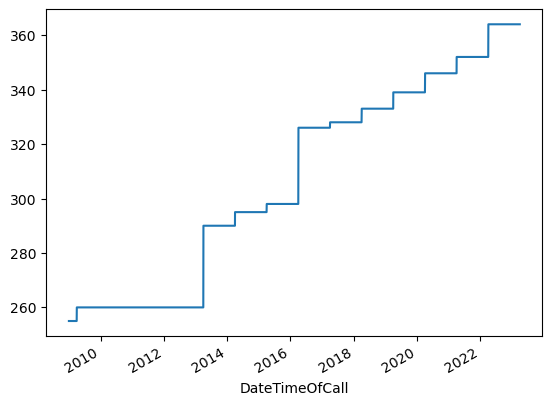

In [29]:
df["HourlyNotionalCost(£)"].plot.line()

In [30]:
df.groupby("StnGroundName")["IncidentNumber"].count()

StnGroundName
Acton          72
Addington      61
Barking        89
Barnet         88
Battersea      78
               ..
Whitechapel    25
Willesden      63
Wimbledon      74
Woodford       89
Woodside       80
Name: IncidentNumber, Length: 108, dtype: int64

### Install this for later `pip install geopandas contextily`

In [45]:
# drop missing longitude/latitude
df2 = df.dropna(subset=["Longitude", "Latitude"])
# also drop zero values
df2 = df2[df2["Latitude"] != 0]
# convert to geodataframe using geopandas
import geopandas

# set crs to EPSG:4326 to specify WGS84 Latitude/Longitude
gdf = geopandas.GeoDataFrame(
    df2,
    geometry=geopandas.points_from_xy(df2["Longitude"], df2["Latitude"]),
    crs="EPSG:4326",
)
gdf.head()

IncidentNumber  CalYear  FinYear  PumpCount   
DateTimeOfCall                                                    
2009-01-01 08:51:00         275091     2009  2008/09        1.0  \
2009-01-04 10:07:00        2075091     2009  2008/09        1.0   
2009-01-05 12:27:00        2872091     2009  2008/09        1.0   
2009-01-07 06:29:00        4011091     2009  2008/09        1.0   
2009-01-07 11:55:00        4211091     2009  2008/09        1.0   

                     PumpHoursTotal  HourlyNotionalCost(£)   
DateTimeOfCall                                               
2009-01-01 08:51:00             1.0                    255  \
2009-01-04 10:07:00             1.0                    255   
2009-01-05 12:27:00             1.0                    255   
2009-01-07 06:29:00             1.0                    255   
2009-01-07 11:55:00             1.0                    255   

                     IncidentNotionalCost(£) FinalDescription   
DateTimeOfCall                                                  
2009-01-01 08:51:00                    255.0         Redacted  \
2009-01-04 10:07:00                    255.0         Redacted   
2009-01-05 12:27:00                    255.0         Redacted   
2009-01-07 06:29:00                    255.0         Redacted   
2009-01-07 11:55:00                    255.0         Redacted   

                    AnimalGroupParent        OriginofCall  ...   
DateTimeOfCall                                             ...   
2009-01-01 08:51:00               Fox  Person (land line)  ...  \
2009-01-04 10:07:00               Dog     Person (mobile)  ...   
2009-01-05 12:27:00             Horse     Person (mobile)  ...   
2009-01-07 06:29:00               Dog  Person (land line)  ...   
2009-01-07 11:55:00               Dog     Person (mobile)  ...   

                               Street        USRN PostcodeDistrict Easting_m   
DateTimeOfCall                                                                 
2009-01-01 08:51:00     Grasmere Road         NaN             SE25  534785.0  \
2009-01-04 10:07:00         Mill Lane         NaN              SM5  528041.0   
2009-01-05 12:27:00         Park Lane  21401484.0              UB9  504689.0   
2009-01-07 06:29:00     Holloway Road         NaN              E11  539013.0   
2009-01-07 11:55:00  Aldersbrook Road         NaN              E12  541327.0   

                    Northing_m Easting_rounded Northing_rounded   Latitude   
DateTimeOfCall                                                               
2009-01-01 08:51:00   167546.0          534750           167550  51.390954  \
2009-01-04 10:07:00   164923.0          528050           164950  51.368941   
2009-01-05 12:27:00   190685.0          504650           190650  51.605283   
2009-01-07 06:29:00   186162.0          539050           186150  51.557221   
2009-01-07 11:55:00   186654.0          541350           186650  51.561067   

                    Longitude                   geometry  
DateTimeOfCall                                            
2009-01-01 08:51:00 -0.064167  POINT (-0.06417 51.39095)  
2009-01-04 10:07:00 -0.161985  POINT (-0.16199 51.36894)  
2009-01-05 12:27:00 -0.489684  POINT (-0.48968 51.60528)  
2009-01-07 06:29:00  0.003880   POINT (0.00388 51.55722)  
2009-01-07 11:55:00  0.037434   POINT (0.03743 51.56107)  

[5 rows x 30 columns]

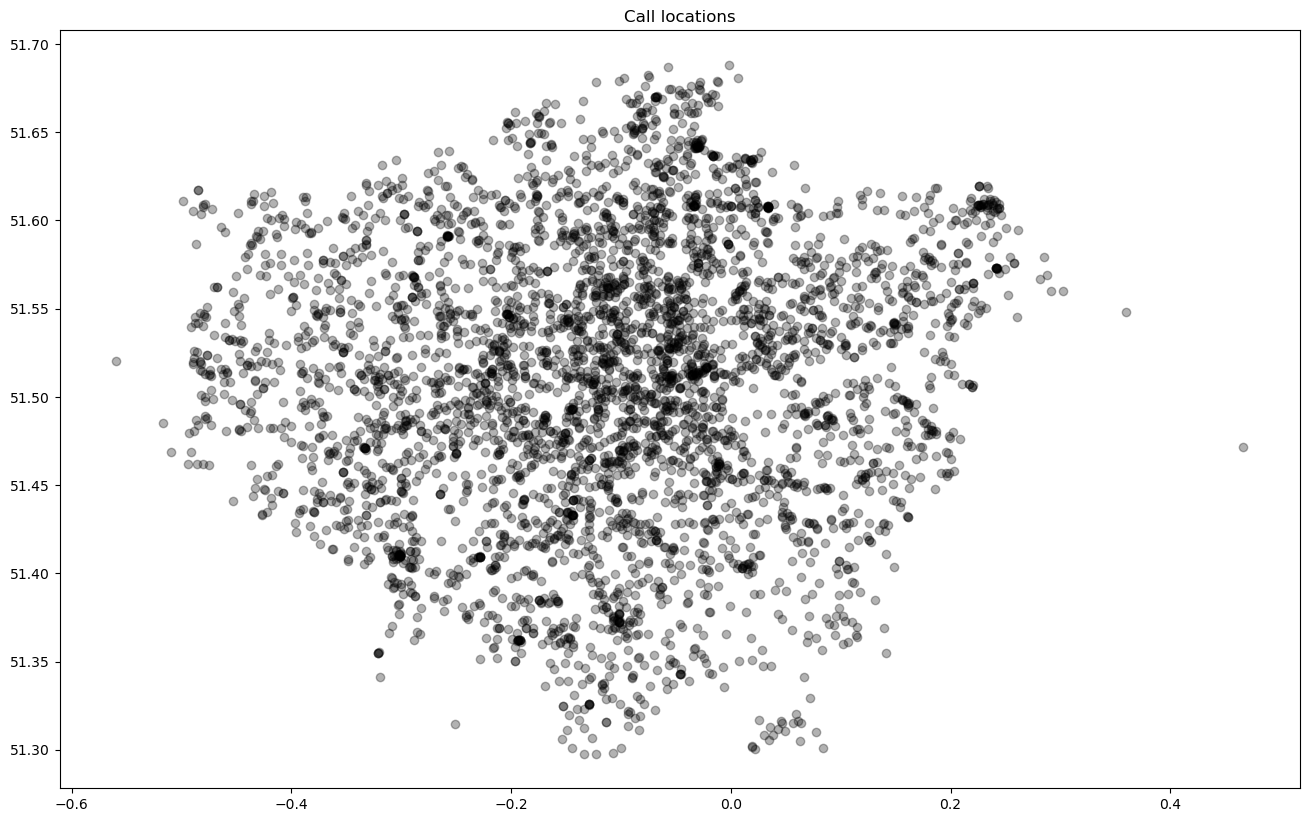

In [46]:
f, ax = plt.subplots(figsize=(16, 16))
# plot location of calls involving animals
gdf.plot(ax=ax, color="black", alpha=0.3)
plt.title("Call locations")
# plt.axis("off")
plt.show()

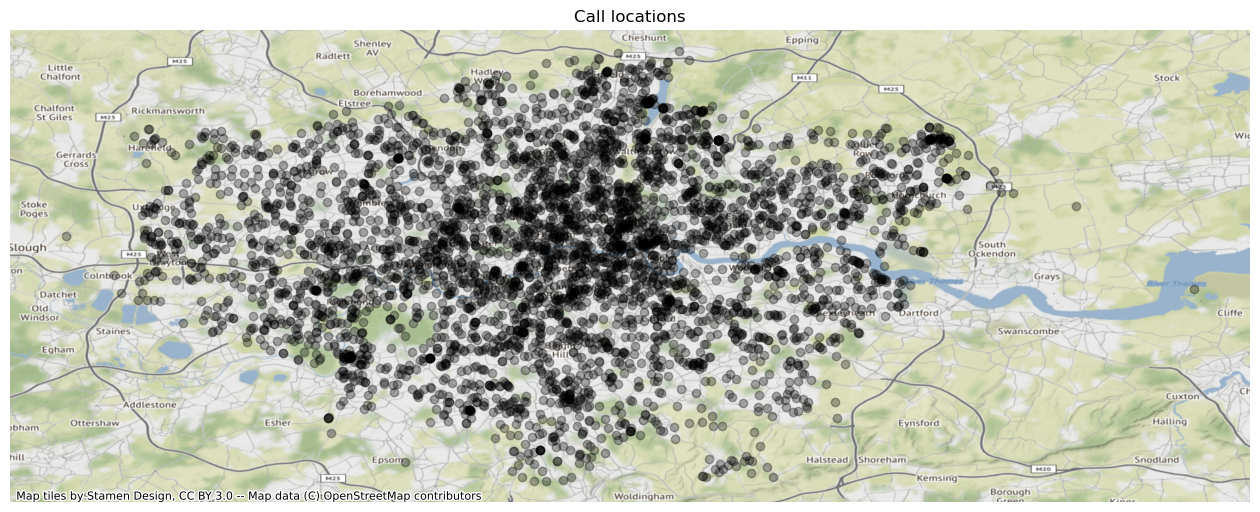

In [47]:
import contextily as cx

f, ax = plt.subplots(figsize=(16, 16))
# plot location of calls involving animals
gdf.plot(ax=ax, color="black", alpha=0.3)
# add a basemap of the region using contextily
cx.add_basemap(ax, crs=gdf.crs)
plt.title("Call locations")
plt.axis("off")
plt.show()

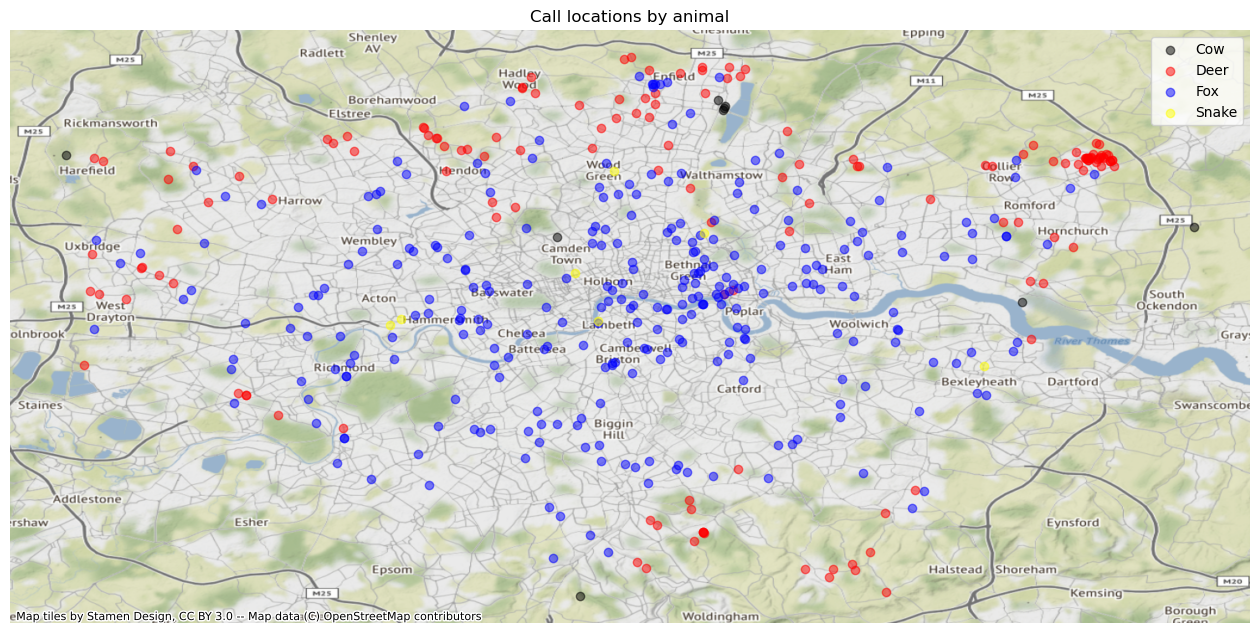

In [51]:
f, ax = plt.subplots(figsize=(16, 16))
# plot location of calls involving animals
for animal, colour in [
    ("Cow", "black"),
    ("Deer", "red"),
    ("Fox", "blue"),
    ("Snake", "yellow"),
    # ("Cat", "teal"),
    # ("Dog", "brown")
]:
    gdf[gdf["AnimalGroupParent"] == animal].plot(
        ax=ax, color=colour, alpha=0.5, label=animal
    )
# add a basemap of the region using contextily
cx.add_basemap(ax, crs=gdf.crs)
plt.title("Call locations by animal")
plt.legend()
plt.axis("off")
plt.show()